In [28]:
import pandas as pd

In [103]:
df= pd.read_csv("C://Users//akhil//Desktop//HAP 880//Week 1//highUtilizationPredictionV2wco.csv")

In [30]:
df.head()

,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,ELIX7,...,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12,HighUtilizationY2,claimCount
0,B,71,PAT136597,0,0,0,0,0,1,0,...,0,1,4,2,1,3,1,1,1,160
1,A,86,PAT119838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2,W,70,PAT11289,1,0,0,0,0,0,0,...,4,2,2,0,6,2,1,0,0,52
3,W,75,PAT178745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15
4,W,77,PAT50922,0,0,0,0,1,0,0,...,4,3,4,4,4,3,4,4,0,66


In [31]:
cls = df.columns.tolist()

In [32]:
cls.remove('race')
cls.remove('patient_id')
cls.remove('HighUtilizationY2')
cls.remove('claimCount')

In [33]:
df1 = df[cls]
label = df.HighUtilizationY2

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
df1=df1.fillna(0)
label=label.fillna(0)

In [35]:
xtr,xts,ytr,yts = train_test_split(df1,label)

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr.coef_

array([[-0.01631137,  0.14420193,  0.4310285 ,  0.2924709 ,  0.00382482,
         0.16068531,  0.69991571, -0.01294074,  0.0829235 ,  0.24552651,
         0.82784624, -0.17430203,  0.12527105,  0.28371339,  0.60072936,
        -0.00741953,  0.17250176,  0.09257223,  0.02300935, -0.07056751,
        -0.09726023,  0.44829088,  0.51404371,  0.19424986,  0.05479779,
         0.1981258 , -0.07649471,  0.26351997,  0.13477507,  0.14237366,
         0.1693833 , -0.03946691, -0.02927511,  0.03650314,  0.45400266,
         0.13721003, -0.08620746, -0.0214594 , -0.00569575,  0.35185592,
         0.31373638,  0.69124622,  0.07590398, -0.01023507,  0.1062188 ,
         0.25256753,  0.12175731, -0.00111288,  0.20668113,  0.32988991,
         0.46393884, -0.0012454 , -0.02205112, -0.0073308 , -0.00975572,
         0.00372791, -0.00642946, -0.01445475, -0.0033906 ,  0.00385701,
        -0.00307341,  0.03015769,  0.03771404,  0.08154068]])

In [43]:
probs=lr.predict_proba(xts)[:,1]

In [44]:
probs

array([0.19187535, 0.01451634, 0.00854056, ..., 0.02025547, 0.01609596,
       0.14126714])

In [45]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [46]:
fpr, tpr, thresholds = roc_curve(yts, probs)

In [47]:
auc(fpr,tpr)

0.8183006752494222

In [48]:
get_ipython().magic('matplotlib inline')

In [49]:
from matplotlib import pyplot as plt

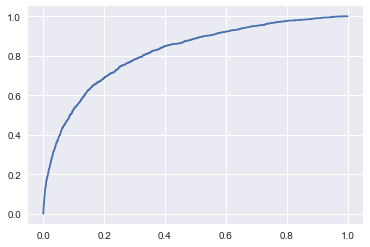

In [50]:
plt.plot(fpr,tpr)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=100)

In [53]:
rf.fit(xtr, ytr)
rf_probs = rf.predict_proba(xts)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(yts, rf_probs[:,1])
auc(rf_fpr, rf_tpr)

0.7976217855169621

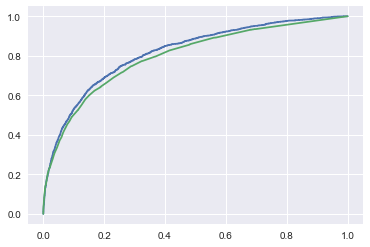

In [54]:
plt.plot(fpr,tpr)
plt.plot(rf_fpr,rf_tpr)

In [78]:
r2 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r2.json")
r2t = r2.T[cls]
print(lr.predict_proba(r2t)[:,1])
print(lr.predict(r2t))

[3.426059e-08]
[0]


In [86]:
r4 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r4.json")
r4t = r4.T[cls]
print(lr.predict_proba(r4t)[:,1])
print(lr.predict(r4t))

[0.09176278]
[0]


In [104]:
clsnew = df.columns.tolist()

In [105]:
clsnew.remove('race')
clsnew.remove('patient_id')
clsnew.remove('HighUtilizationY2')
clsnew.remove('claimCount')
clsnew.remove('ELIX5')

In [108]:
df2 = df[clsnew]
label = df.HighUtilizationY2

In [109]:
xtr2,xts2,ytr2,yts2 = train_test_split(df2,label)

In [110]:
lr = LogisticRegression()

In [111]:
lr.fit(xtr2,ytr2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
probs=lr.predict_proba(xts2)[:,1]

In [116]:
r3 = pd.read_json("C://Users//akhil//Desktop//HAP 880//Week 1//Assignment 1\\r3.json")
r3t = r3.T[clsnew]

In [118]:
r3t

,age,ELIX1,ELIX2,ELIX3,ELIX4,ELIX6,ELIX7,ELIX8,ELIX9,ELIX10,...,drugs_m2-3,drugs_m3-4,drugs_m4-5,drugs_m5-6,drugs_m6-7,drugs_m7-8,drugs_m8-9,drugs_m9-10,drugs_m10-11,drugs_m11-12
0,69,0,0,Yes,0,0,0,0,1,0,...,1,2,1,1,0,3,1,1,1,3


In [119]:
r3t = r3t.set_value(0,'ELIX3', 1)

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [120]:
print(lr.predict_proba(r3t))

[[0.98521992 0.01478008]]


In [121]:
print(lr.predict(r3t))

[0]


In [1]:
dsffsdfsf

NameError: name 'dsffsdfsf' is not defined